## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [16]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [18]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll start by filtering out columns and keeping only: price, bedrooms, bathrooms, sqft_living, floors, and waterfront.

In [19]:
# answer below:
king = pd.concat([king_county['price'],
                  king_county['bedrooms'],
                  king_county['bathrooms'],
                  king_county['sqft_living'],
                  king_county['floors'],
                  king_county['waterfront']], axis =1)
king

,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,221900.0,3,1.00,1180,1.0,0
1,538000.0,3,2.25,2570,2.0,0
2,180000.0,2,1.00,770,1.0,0
3,604000.0,4,3.00,1960,1.0,0
4,510000.0,3,2.00,1680,1.0,0
...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0
21609,400000.0,4,2.50,2310,2.0,0
21610,402101.0,2,0.75,1020,2.0,0
21611,400000.0,3,2.50,1600,2.0,0


Next create a pair plot in Seaborn to see the relationships between your features.

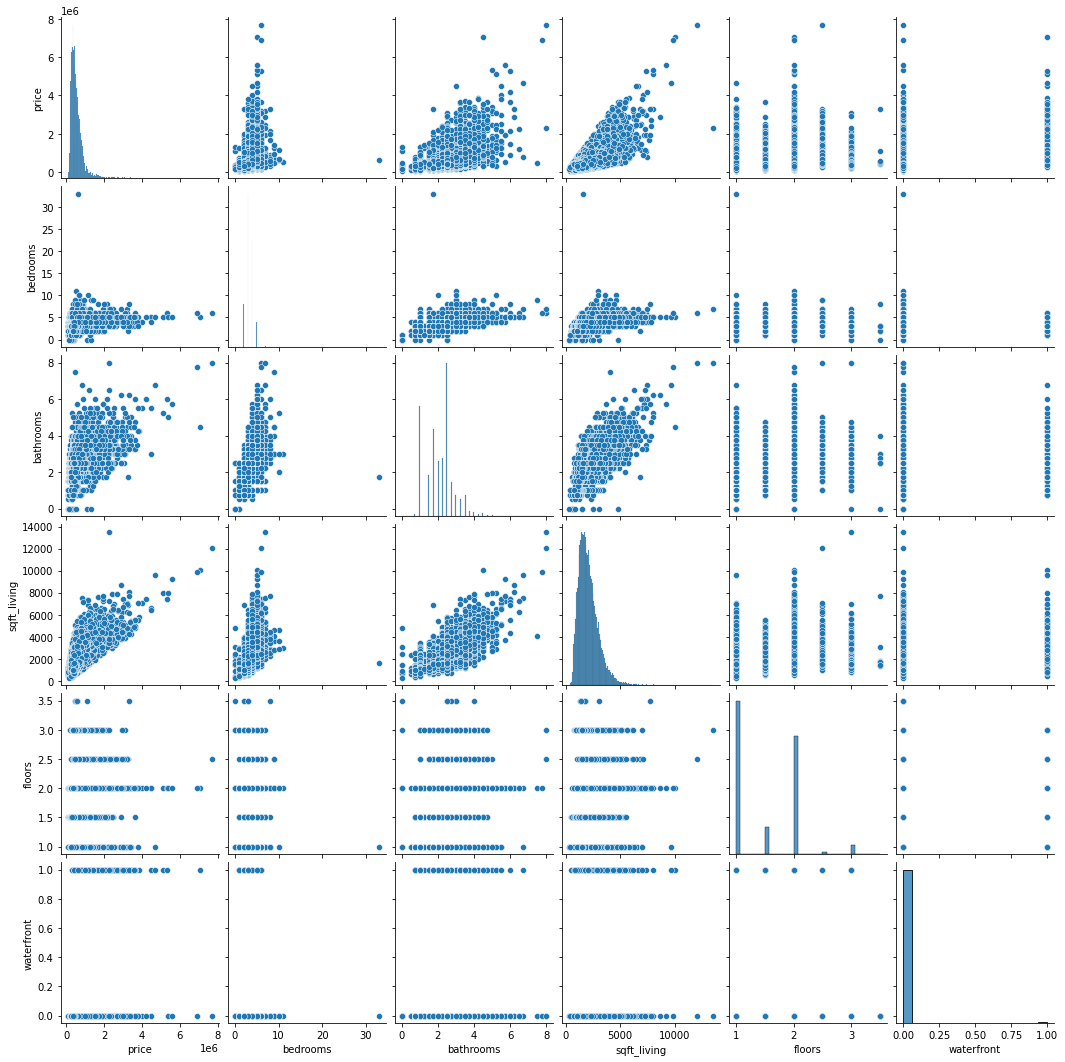

In [20]:
# answer below:
import seaborn as sns
sns.pairplot(king)


There are two noticeable outliers here that will cause problems. Remove them.

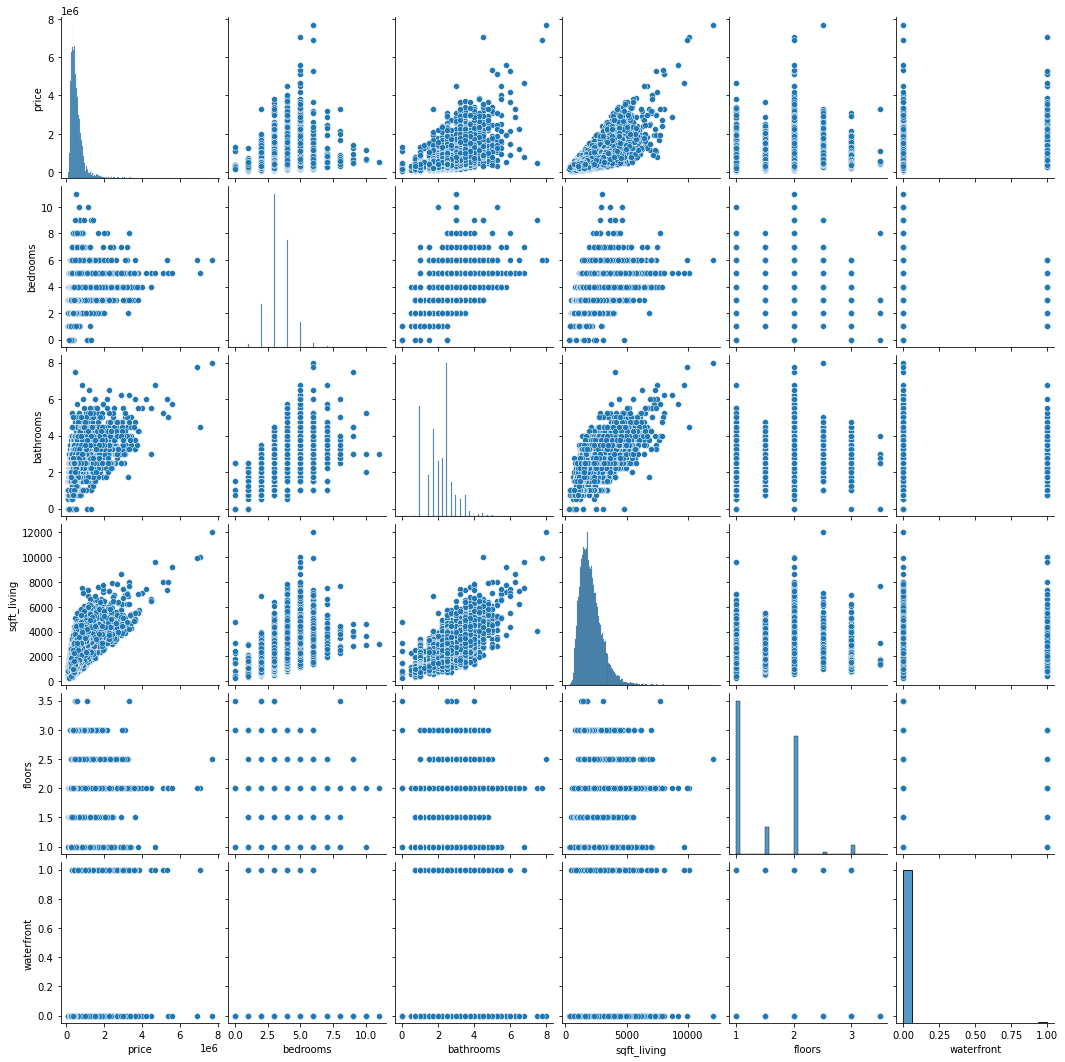

In [ ]:
# answer below:
king = king[king['bedrooms'] < 30]
king = king[king['sqft_living'] < 13000]
sns.pairplot(king)


Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [28]:
king.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21611 non-null  float64
 1   bedrooms     21611 non-null  int64  
 2   bathrooms    21611 non-null  float64
 3   sqft_living  21611 non-null  int64  
 4   floors       21611 non-null  float64
 5   waterfront   21611 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [32]:
# answer below:
from sklearn.model_selection import train_test_split
y = king['price']
X = king.drop(['price'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [36]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()

lrm.fit(X_train, y_train)

print('Coef:', lrm.coef_[1:])
print('\nIntercept: ', lrm.intercept_)

Coef: [-5.76255850e+04  1.03179866e+04  3.03431487e+02 -1.74186238e+02
  7.99687720e+05]

Intercept:  76265.61681846902


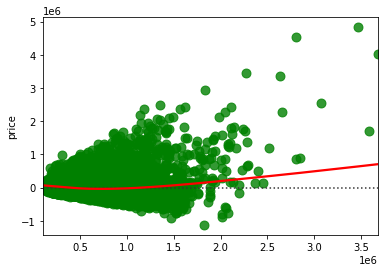

In [47]:
sns.residplot(x=pred, y=error,
              scatter_kws={"s": 80}, color='green', lowess=True, robust=True, 
              line_kws={'color': 'red'});

In [ ]:
pred = lrm.predict(X_train)
error = y_train - pred

print("Mean of the errors: {}".format(np.mean(error)))

Mean of the errors: -4.0696205313574767e-11


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


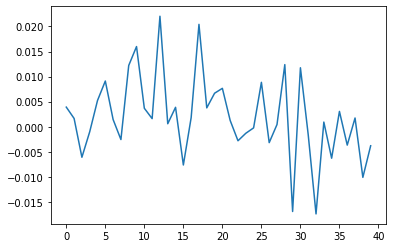

In [43]:
from statsmodels.tsa.stattools import acf

acf_data = acf(error)

plt.plot(acf_data[1:])
plt.show()

In [46]:
X_train.corr()

,const,bedrooms,bathrooms,sqft_living,floors,waterfront
const,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,NaN,1.000000,0.527916,0.589321,0.177222,-0.011850
bathrooms,NaN,0.527916,1.000000,0.754422,0.500463,0.060224
sqft_living,NaN,0.589321,0.754422,1.000000,0.354781,0.099355
floors,NaN,0.177222,0.500463,0.354781,1.000000,0.014455
waterfront,NaN,-0.011850,0.060224,0.099355,0.014455,1.000000


Create your final linear model and produce a model summary. Look at the coefficients and interpret their meaning. How do each of them influence the final prediction?

In [49]:
#answer below:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     4138.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        18:11:15   Log-Likelihood:            -2.3937e+05
No. Observations:               17288   AIC:                         4.788e+05
Df Residuals:                   17282   BIC:                         4.788e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.627e+04   8446.519      9.029      

Text(0, 0.5, 'Prediction')

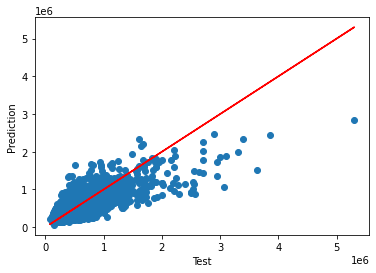

In [56]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('Test')
plt.ylabel('Prediction')

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE. How accurate is our model?

In [60]:
# answer below:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

print('Mean Absolute Error: ', mean_absolute_error(y_test,y_pred))
print('Mean Absolute Percentage Error: ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('Mean Squared Error: ', mse(y_test,y_pred))
print('Root Mean Squared Error: ', rmse(y_test,y_pred))

Mean Absolute Error:  168673.82901881178
Mean Absolute Percentage Error:  35.5889556218141
Mean Squared Error:  58832285316.75588
Root Mean Squared Error:  242553.67512523054


Apply a ridge regression model with lambda=50 to the data and evaluate by looking at r squared for test and train

In [64]:
from sklearn.linear_model import Ridge
ridge1 = Ridge(alpha=50)
ridge1.fit(X_train,y_train)

y_preds_train = ridge1.predict(X_train)
y_preds_test = ridge1.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridge1.score(X_train, y_train)))
print("\n\nR-squared of the model on the test set is: {}".format(ridge1.score(X_test, y_test)))



R-squared of the model on the training set is: 0.5421143712439889


R-squared of the model on the test set is: 0.5315985877165476


Perform a grid search for the following values of alpha: 0.001, 0.01, 0.1, 1, 10, 100, 1000 to find the most optimal ridge regression model. Experiment with different scoring metrics in the grid search (R^2 is the default, but you can use root mean squared error or many others). 
https://scikit-learn.org/stable/modules/model_evaluation.html

In [65]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.001,0.01,0.1,1,10,100,1000]}

grid = GridSearchCV(Ridge(), param_grid = params)

grid.fit(X_train,y_train)

grid.best_estimator_.alpha

0.1